In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

#### Loading Data

In [2]:
df = pd.read_csv('Dataset/salary_data_cleaned.csv')

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'average_salary', 'job_state',
       'same_state', 'company_age', 'desc_len', 'count_Competitors',
       'Job Simple', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'revenue_simpler', 'seniority'],
      dtype='object')

#### selecting columns

In [4]:
df_model = df[['average_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','count_Competitors','hourly','employer_provided',
             'job_state','same_state','company_age','python_yn','spark','aws','excel','Job Simple','seniority','desc_len']]


#### Copy for the data

In [5]:
df_cp = pd.get_dummies(df_model)

#### train test split 

In [6]:
from sklearn.model_selection import train_test_split

X = df_cp.drop('average_salary', axis =1)
y = df_cp.average_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=35)


#### Linear Regression

In [7]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     11.18
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          2.82e-103
Time:                        03:03:57   Log-Likelihood:                -8434.7
No. Observations:                 742   AIC:                         1.717e+04
Df Residuals:                     594   BIC:                         1.785e+04
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              3.385e+04   9846.076      3.438      0.001    1.45e+04    5.32e+04
Rating                                             4976.6747   1959.055      2.540      0.011    1129.158    8824.192
count_Competitors                                  2270.7724    890.110      2.551      0.011     522.627    4018.917
hourly                                            -6.859e+04   9351.687     -7.335      0.000    -8.7e+04   -5.02e+04
employer_provided                                  3.431e+04   1.16e+04      2.954      0.003    1.15e+04    5.71e+04
same_state                                         2556.9103   2653.564      0.964      0.336   -2654.599    7768.420
company_age                                          36.4994     30.343      1.203      0.230     -23.094      96.093
python_yn                                          9971.1333   2603.108      3.830      0.000    4858.719    1.51e+04
spark                                               438.9674   2911.810      0.151      0.880   -5279.727    6157.662
aws                                                2029.9457   2758.343      0.736      0.462   -3387.345    7447.236
excel                                             -1482.8869   2306.859     -0.643      0.521   -6013.479    3047.705
desc_len                                             -0.4410      0.763     -0.578      0.564      -1.940       1.058
Size_-1                                             1.11e+04   8871.240      1.251      0.211   -6322.452    2.85e+04
Size_1 to 50                                        964.3491   6518.185      0.148      0.882   -1.18e+04    1.38e+04
Size_10000+                                        -520.7235   5823.002     -0.089      0.929    -1.2e+04    1.09e+04
Size_1001 to 5000                                  5460.0276   3872.222      1.410      0.159   -2144.885    1.31e+04
Size_201 to 500                                     705.2777   3885.020      0.182      0.856   -6924.769    8335.325
Size_5001 to 10000                                -2136.9744   5446.413     -0.392      0.695   -1.28e+04    8559.594
Size_501 to 1000                                   3009.5714   4101.558      0.734      0.463   -5045.748    1.11e+04
Size_51 to 200                                     1842.1714   4443.069      0.415      0.679   -6883.864    1.06e+04
Size_Unknown                                       1.343e+04   1.46e+04      0.918      0.359   -1.53e+04    4.22e+04
Type of ownership_-1                                1.11e+04   8871.240      1.251      0.211   -6322.452    2.85e+04
Type of ownership_College / University             2668.2718   1.81e+04      0.147      0.883   -3.29e+04    3.82e+04
Type of ownersh

In [8]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
import sklearn.metrics
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 7))

-19845.293699478643

#### Lasso Regression

In [9]:
lm_l = Lasso(alpha=.99)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, n_jobs=5, scoring = 'neg_mean_absolute_error', cv= 7))



-19833.596158243923

**Choosing Best Alpha value**

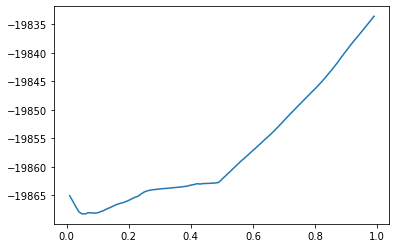

In [10]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, n_jobs=5, scoring = 'neg_mean_absolute_error', cv= 7)))
    
plt.plot(alpha,error)

In [11]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])

In [12]:
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-19833.596158


#### Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 7))


-14020.69286539331

#### Tuning Parameter using gridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=7)
gs.fit(X_train,y_train)

gs.best_estimator_

#### Predicting Values

In [ ]:
gs.best_score_

In [ ]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)
df_test = pd.DataFrame((y_test,tpred_lm,tpred_lml,tpred_rf))

In [ ]:
df_test

#### Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)


In [ ]:
mean_absolute_error(y_test,tpred_lml)


In [ ]:
mean_absolute_error(y_test,tpred_rf)

In [ ]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)